# Задание 7.
Проведите анализ выживаемости пациентов с раком толстой кишки на приложенном к уроку датасете, используя код с занятия.
Попробуйте сравнить кривые выживаемости с различными ковариатами.


In [ ]:
# загрузка данных---------------------------------------------------------------
from google.colab import files
uploaded = files.upload()

Saving colon_dataset.tsv to colon_dataset.tsv


In [ ]:
# загрузка пакетов--------------------------------------------------------------
install.packages('ggsurvfit')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggplot2’, ‘patchwork’, ‘survival’




In [ ]:
install.packages('gtsummary')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘V8’, ‘reactR’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘broom.helpers’, ‘gt’




In [ ]:
install.packages('tidycmprsk')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cmprsk’, ‘hardhat’




In [ ]:
install.packages('condsurv')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘condsurv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘condSURV’ ?”


In [ ]:
library(lubridate)
library(tidyverse)
library(survival)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)
#library(condsurv)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.5
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.5.1     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial




In [ ]:
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)

In [ ]:
# dataset-----------------------------------------------------------------------
data <- read_tsv("/content/colon_dataset.tsv")

Rows: 1858 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): rx
dbl (15): id, study, sex, age, obstruct, perfor, adhere, nodes, status, diff...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(data)

id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,1


In [ ]:
# проверка на пропуски----------------------------------------------------------
sum(complete.cases(data))

[1] 1776

In [ ]:
View(data[!complete.cases(data), ])

id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
64,1,Lev,0,53,1,0,0,1,0,NA,3,0,0,2739,2
64,1,Lev,0,53,1,0,0,1,0,NA,3,0,0,2739,1
83,1,Lev,1,70,0,0,0,3,1,NA,2,0,0,1548,2
83,1,Lev,1,70,0,0,0,3,0,NA,2,0,0,1548,1
90,1,Lev,1,73,1,0,0,4,1,NA,3,0,0,997,2
90,1,Lev,1,73,1,0,0,4,1,NA,3,0,0,797,1
94,1,Lev+5FU,0,26,0,0,1,NA,0,2,4,1,1,2869,2
94,1,Lev+5FU,0,26,0,0,1,NA,0,2,4,1,1,2869,1
99,1,Lev,1,71,0,0,1,NA,1,2,4,0,1,569,2


In [ ]:
install.packages("mice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’




In [ ]:
install.packages( "VIM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘zoo’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’




In [ ]:
library(mice)
library(VIM)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




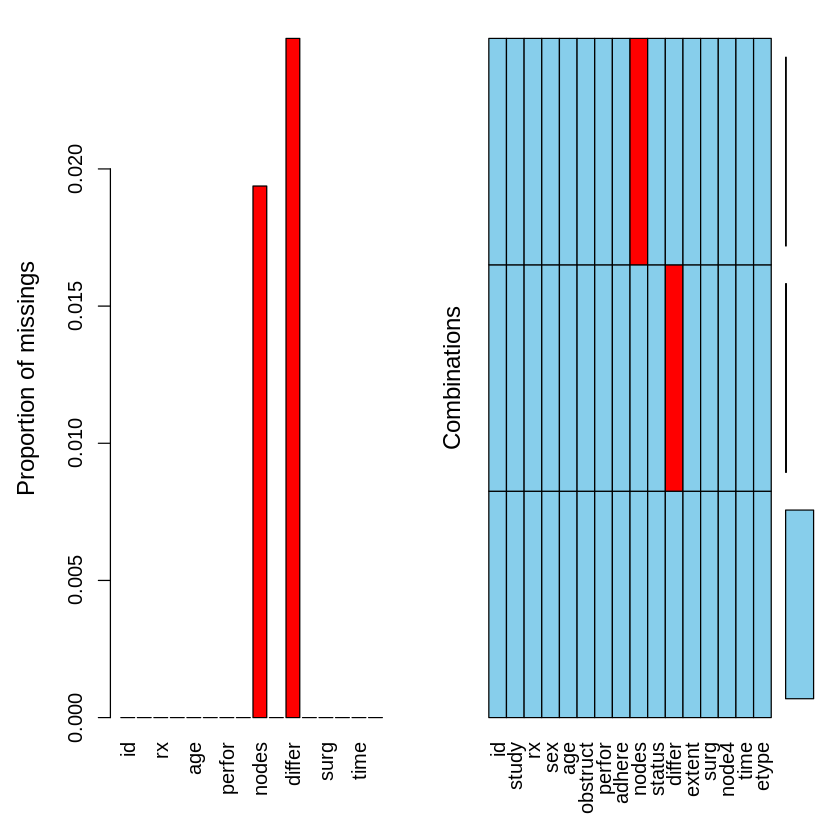

In [ ]:
aggr(data)

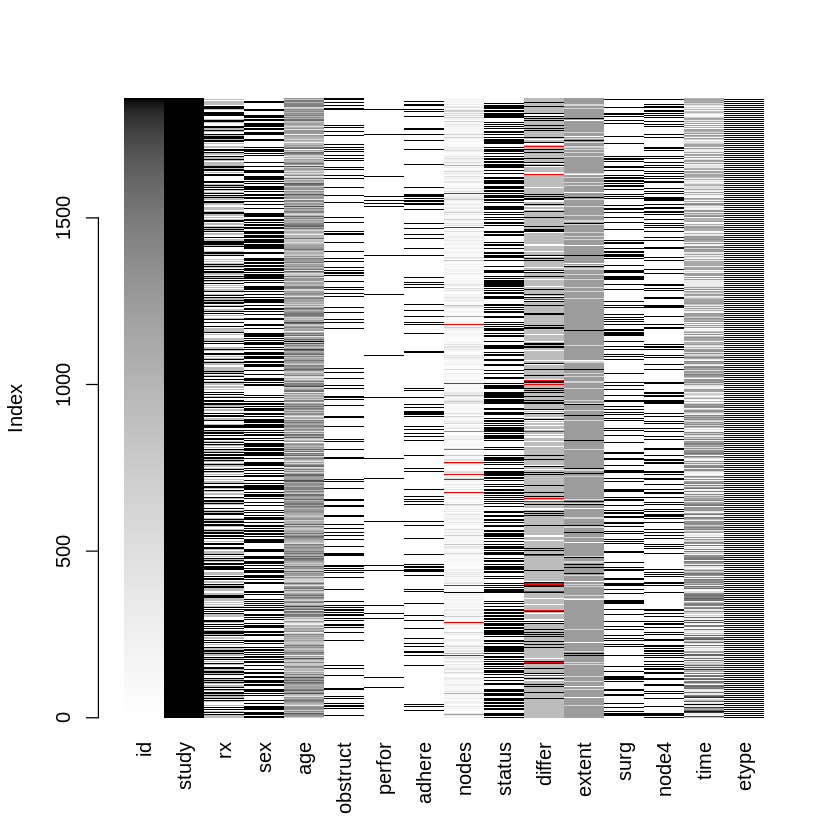

In [ ]:
matrixplot(data)

# Препроцессинг данных

In [ ]:
# удаление пропусков------------------------------------------------------------
data <- data %>%
  drop_na

In [ ]:
str(data)

tibble [1,776 × 16] (S3: tbl_df/tbl/data.frame)
 $ id      : num [1:1776] 1 1 2 2 3 3 4 4 5 5 ...
 $ study   : num [1:1776] 1 1 1 1 1 1 1 1 1 1 ...
 $ rx      : chr [1:1776] "Lev+5FU" "Lev+5FU" "Lev+5FU" "Lev+5FU" ...
 $ sex     : num [1:1776] 1 1 1 1 0 0 0 0 1 1 ...
 $ age     : num [1:1776] 43 43 63 63 71 71 66 66 69 69 ...
 $ obstruct: num [1:1776] 0 0 0 0 0 0 1 1 0 0 ...
 $ perfor  : num [1:1776] 0 0 0 0 0 0 0 0 0 0 ...
 $ adhere  : num [1:1776] 0 0 0 0 1 1 0 0 0 0 ...
 $ nodes   : num [1:1776] 5 5 1 1 7 7 6 6 22 22 ...
 $ status  : num [1:1776] 1 1 0 0 1 1 1 1 1 1 ...
 $ differ  : num [1:1776] 2 2 2 2 2 2 2 2 2 2 ...
 $ extent  : num [1:1776] 3 3 3 3 2 2 3 3 3 3 ...
 $ surg    : num [1:1776] 0 0 0 0 0 0 1 1 1 1 ...
 $ node4   : num [1:1776] 1 1 0 0 1 1 1 1 1 1 ...
 $ time    : num [1:1776] 1521 968 3087 3087 963 ...
 $ etype   : num [1:1776] 2 1 2 1 2 1 2 1 2 1 ...


In [ ]:
unique(data$study) # колонка study не представляет интереса

[1] 1

In [ ]:
data <- data %>%
  select(-study)

In [ ]:
# изменение признака etype------------------------------------------------------
data <- data %>%
  as_tibble() %>%
  mutate(etype = recode(etype, '1' = 0, '2' = 1))

In [ ]:
# перевод категориальных признаков в факторы------------------------------------
data <- data %>%
  mutate(id = as.factor(id)) %>%
  mutate(rx = as.factor(rx)) %>%
  mutate(sex = as.factor(sex)) %>%
  mutate(obstruct = as.factor(obstruct)) %>%
  mutate(perfor = as.factor(perfor)) %>%
  mutate(adhere = as.factor(adhere)) %>%
  mutate(nodes = as.factor(nodes)) %>%
  mutate(status = as.factor(status)) %>%
  mutate(differ = as.factor(differ)) %>%
  mutate(extent = as.factor(extent)) %>%
  mutate(surg = as.factor(surg)) %>%
  mutate(node4 = as.factor(node4)) %>%
  mutate(etype = as.factor(etype))




*   rx - лечение противоопухолевыми препаратами
*   sex - пол
*   age - возраст
*   obstruct - непроходимость
*   perfor - нарушение целостности стенки кишечника
*   adhere - прилегание к близлежащим органам
*   nodes - количество лимфатических узлов
*   status - статус цензурирования
*   extent - степень местного распространения
*   differ - дифференциация опухоли
*   node4 - более 4 увеличенных лимфатических узлов
*   surg - отсрочка по хирургии
*   time - время до события или цензурирования
*   etype - тип события (0-рецидив и 1-смерть)














In [ ]:
data

id,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,1
1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,0
2,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
2,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,0
3,Obs,0,71,0,0,1,7,1,2,2,0,1,963,1
3,Obs,0,71,0,0,1,7,1,2,2,0,1,542,0
4,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,293,1
4,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,245,0
5,Obs,1,69,0,0,0,22,1,2,3,1,1,659,1


# Анализ выживаемости

In [ ]:
summary(data)

       id             rx      sex          age        obstruct perfor  
 1      :   2   Lev    :588   0:856   Min.   :18.00   0:1434   0:1722  
 2      :   2   Lev+5FU:578   1:920   1st Qu.:53.00   1: 342   1:  54  
 3      :   2   Obs    :610           Median :61.00                    
 4      :   2                         Mean   :59.81                    
 5      :   2                         3rd Qu.:69.00                    
 6      :   2                         Max.   :85.00                    
 (Other):1764                                                          
 adhere       nodes     status  differ   extent   surg     node4   
 0:1520   1      :538   0:900   1: 180   1:  38   0:1300   0:1306  
 1: 256   2      :372   1:876   2:1306   2: 204   1: 476   1: 470  
          3      :238           3: 290   3:1460                    
          4      :166                    4:  74                    
          5      : 92                                              
          6     

# Метод Каплана-Майера

In [ ]:
Surv(data$time, data$status)[1:10] # рассчитанное время до события--------------

 [1] 1521:1  968:1 3087+  3087+   963:1  542:1  293:1  245:1  659:1  523:1

In [ ]:
s1 <- survfit(Surv(time, status==1) ~ 1, data = data) # кривая Каплана-Майера---
str(s1)

List of 16
 $ n        : int 1776
 $ time     : num [1:1034] 8 9 19 20 23 24 28 34 35 36 ...
 $ n.risk   : num [1:1034] 1776 1775 1774 1773 1772 ...
 $ n.event  : num [1:1034] 1 1 1 1 1 1 1 1 1 1 ...
 $ n.censor : num [1:1034] 0 0 0 0 1 1 0 0 0 0 ...
 $ surv     : num [1:1034] 0.999 0.999 0.998 0.998 0.997 ...
 $ std.err  : num [1:1034] 0.000563 0.000797 0.000976 0.001127 0.001261 ...
 $ cumhaz   : num [1:1034] 0.000563 0.001126 0.00169 0.002254 0.002818 ...
 $ std.chaz : num [1:1034] 0.000563 0.000797 0.000976 0.001127 0.00126 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:1034] 0.998 0.997 0.996 0.996 0.995 ...
 $ upper    : num [1:1034] 1 1 1 1 1 ...
 $ call     : language survfit(formula = Surv(time, status == 1) ~ 1, data = data)
 - attr(*, "class")= chr "survfit"


In [ ]:
s1

Call: survfit(formula = Surv(time, status == 1) ~ 1, data = data)

        n events median 0.95LCL 0.95UCL
[1,] 1776    876   2458    2031    2910

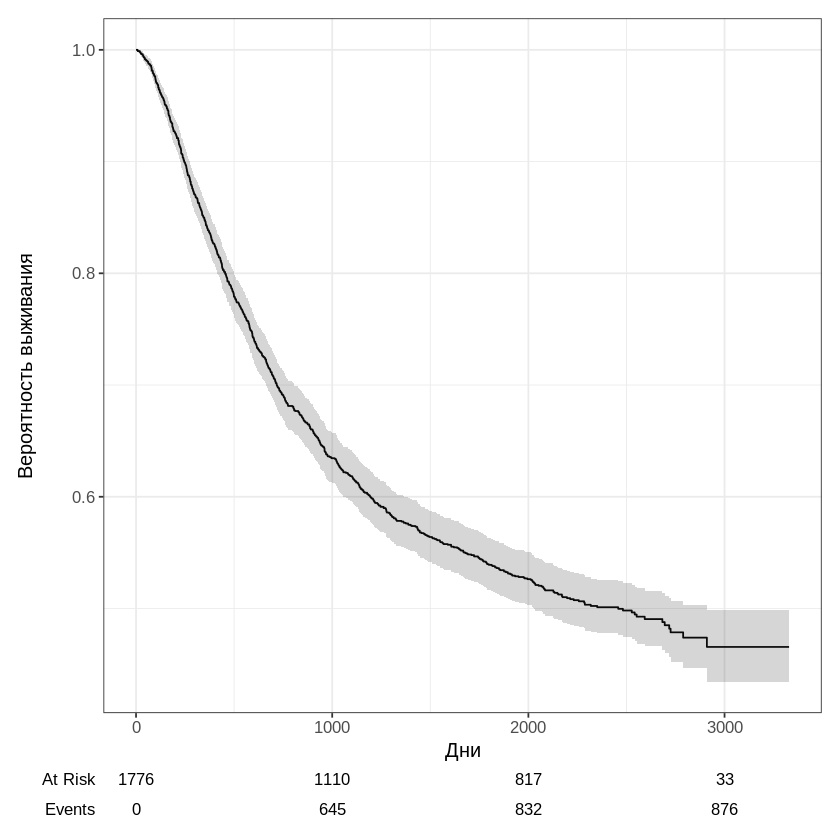

In [ ]:
survfit2(Surv(time, status==1) ~ 1, data = data) %>% # кривая Каплана-Майера----
  ggsurvfit() +
  labs(x = "Дни", y = "Вероятность выживания") +
  add_confidence_interval() +
  add_risktable()

In [ ]:
summary(s1, time = 365.25) # выживаемость в точке 1 год = 84%-------------------

Call: survfit(formula = Surv(time, status == 1) ~ 1, data = data)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  365   1484     284     0.84 0.00872        0.823        0.857

График вероятности смерти

Plotting outcome "1".


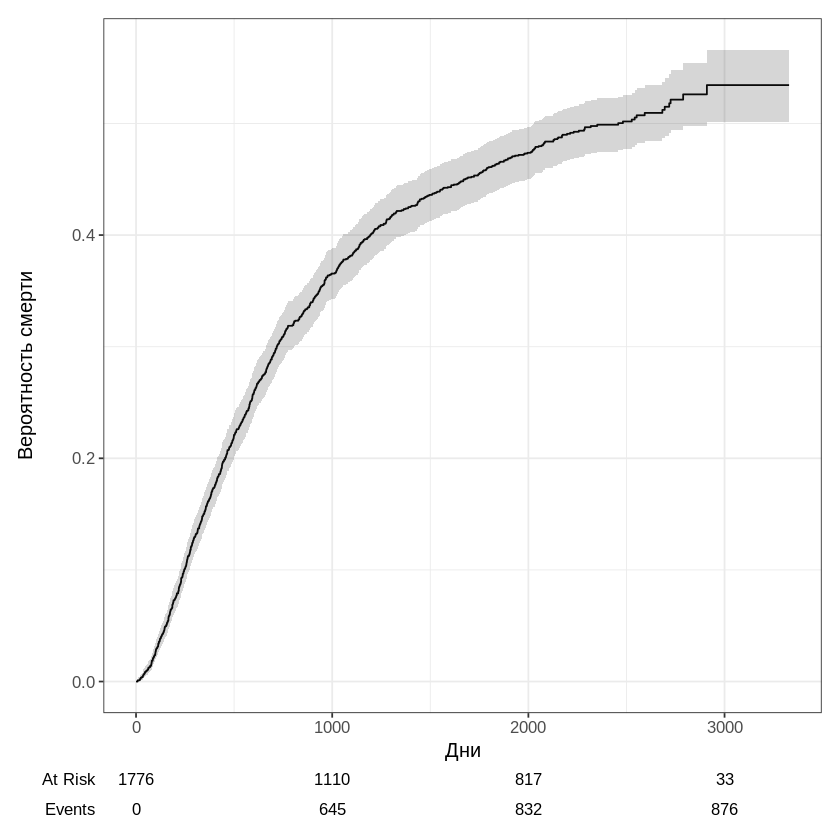

In [ ]:
cuminc(Surv(time, status) ~ 1, data = data) %>%
  ggcuminc() +
  labs(x = "Дни", y = "Вероятность смерти") +
  add_confidence_interval() +
  add_risktable()

График смертности в разрезе node4

Plotting outcome "1".


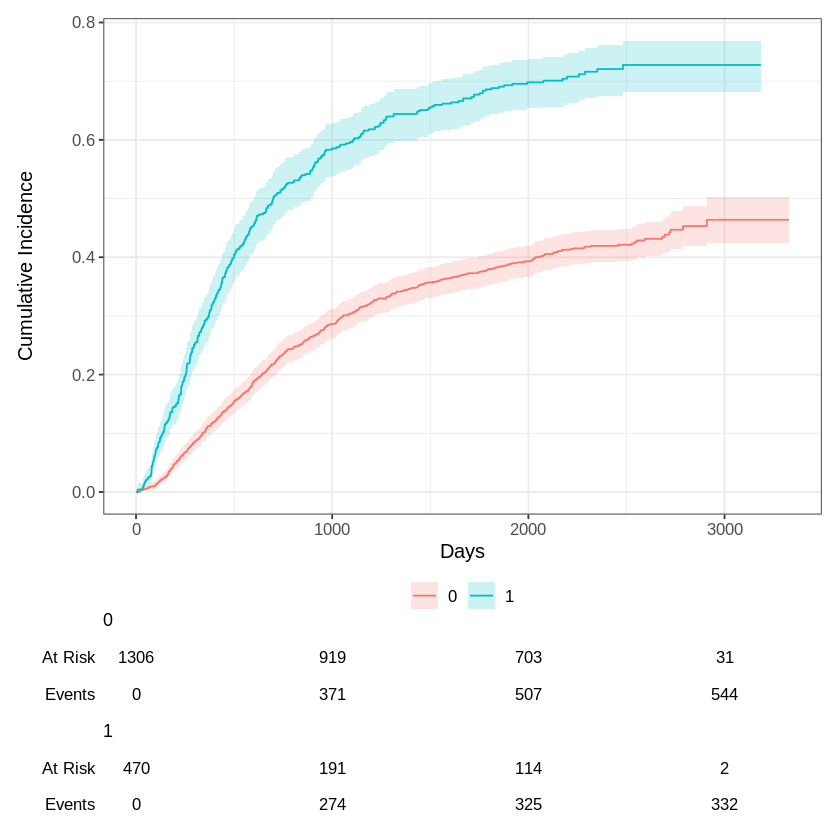

In [ ]:
cuminc(Surv(time, status) ~ node4, data = data) %>%
  ggcuminc() +
  labs(
    x = "Days"
  ) +
  add_confidence_interval() +
  add_risktable()

График смертности в разрезе пола

Plotting outcome "1".


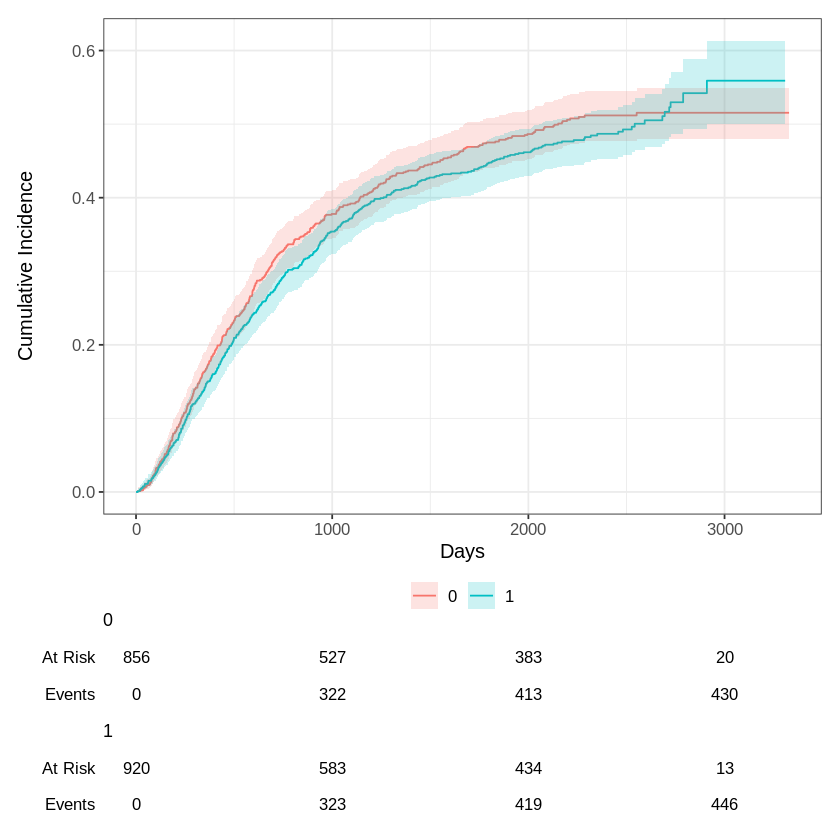

In [ ]:
cuminc(Surv(time, status) ~ sex, data = data) %>%
  ggcuminc() +
  labs(
    x = "Days"
  ) +
  add_confidence_interval() +
  add_risktable()

In [ ]:
summary(survfit(Surv(time, status) ~ 1, data = data), times = 365.25)

Call: survfit(formula = Surv(time, status) ~ 1, data = data)

 time n.risk n.event Pr((s0)) Pr(1)
  365   1484     284     0.84  0.16

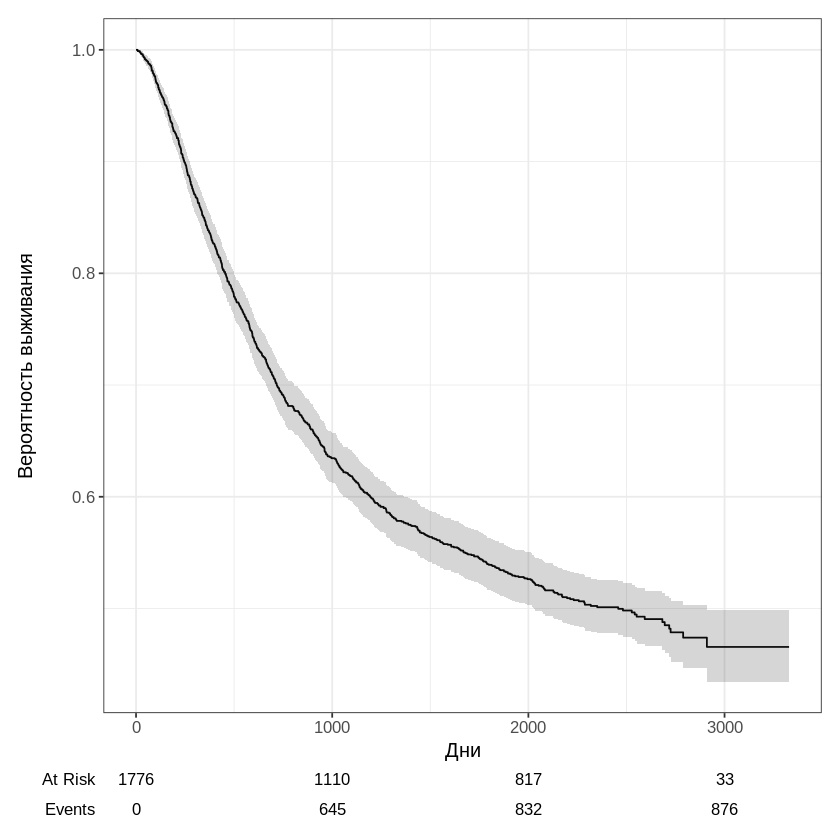

In [ ]:
s1 %>% # медианное время -------------------------------------------------------
  ggsurvfit() +
  labs(x = "Дни", y = "Вероятность выживания") +
  add_confidence_interval() +
  add_risktable()

# Регрессия конкурирующих рисков

In [ ]:
crr(Surv(time, status) ~ sex + node4, data = data)



── crr() ───────────────────────────────────────────────────────────────────────

• Call Surv(time, status) ~ sex + node4

• Failure type of interest "1"




Variable   Coef     SE      HR     95% CI       p-value    
sex1       -0.043   0.068   0.96   0.84, 1.09   0.53       
node41     0.899    0.071   2.46   2.14, 2.83   <0.001     

# Лонг-Ранг тест

In [ ]:
install.packages("survminer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’




In [ ]:
library(survminer)

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [ ]:
# метод поиска функии выживаемости в разрезе node4------------------------------
survdiff(Surv(time, status==1) ~ node4, data=data)

Call:
survdiff(formula = Surv(time, status == 1) ~ node4, data = data)

           N Observed Expected (O-E)^2/E (O-E)^2/V
node4=0 1306      544      701        35       176
node4=1  470      332      175       140       176

 Chisq= 176  on 1 degrees of freedom, p= <2e-16 

In [ ]:
fit <- survfit(Surv(time, status == 1) ~ node4, data=data)

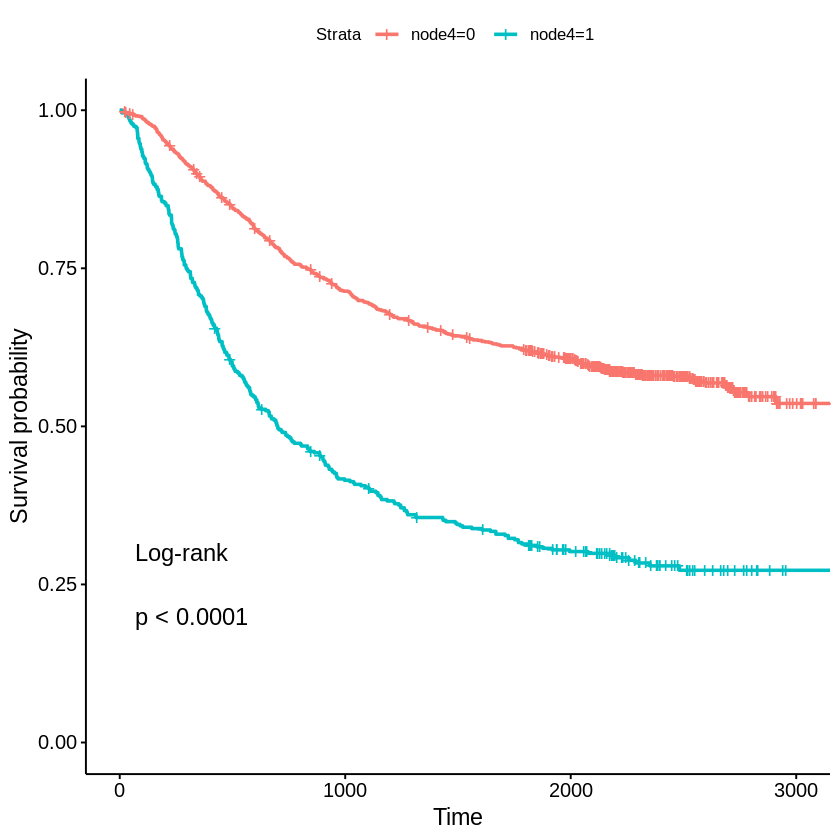

In [ ]:
survminer::ggsurvplot(fit, data = data,  pval = TRUE, pval.method = TRUE)

у группы node4=0 выживаемость лучше

In [ ]:
# метод поиска функии выживаемости в разрезе пола ------------------------------
survdiff(Surv(time, status==1) ~ sex, data=data)

Call:
survdiff(formula = Surv(time, status == 1) ~ sex, data = data)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=0 856      430      417     0.399     0.762
sex=1 920      446      459     0.362     0.762

 Chisq= 0.8  on 1 degrees of freedom, p= 0.4 

In [ ]:
fit <- survfit(Surv(time, status == 1) ~ sex, data=data)

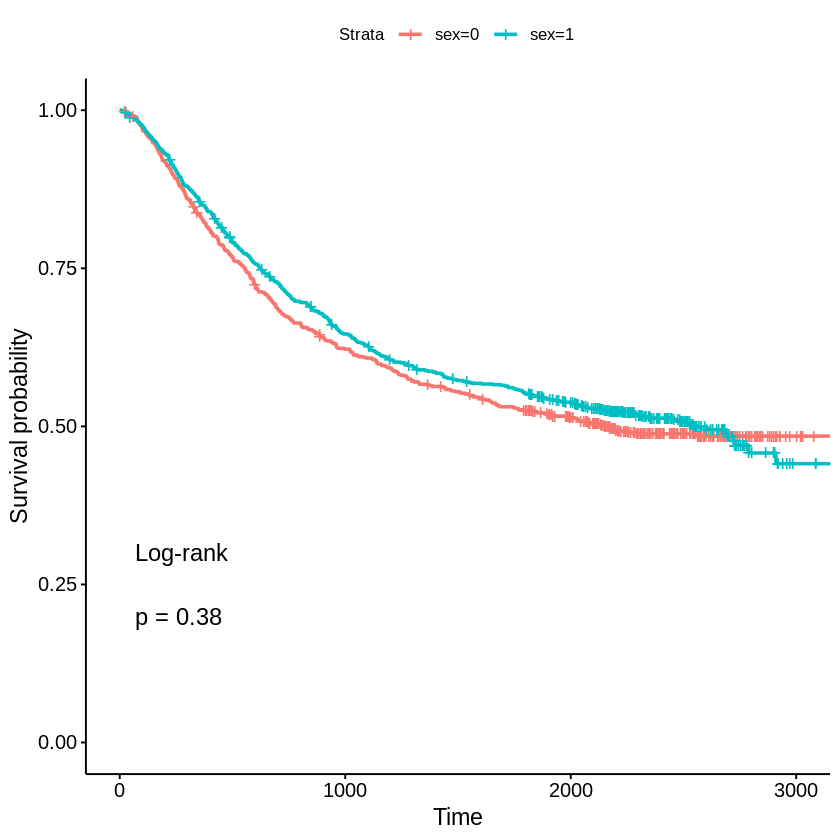

In [ ]:
survminer::ggsurvplot(fit, data = data,  pval = TRUE, pval.method = TRUE)

у женщин выживаемость лучше, но после отметки пимерно 2600 (~ 7 лет) ситуация меняется

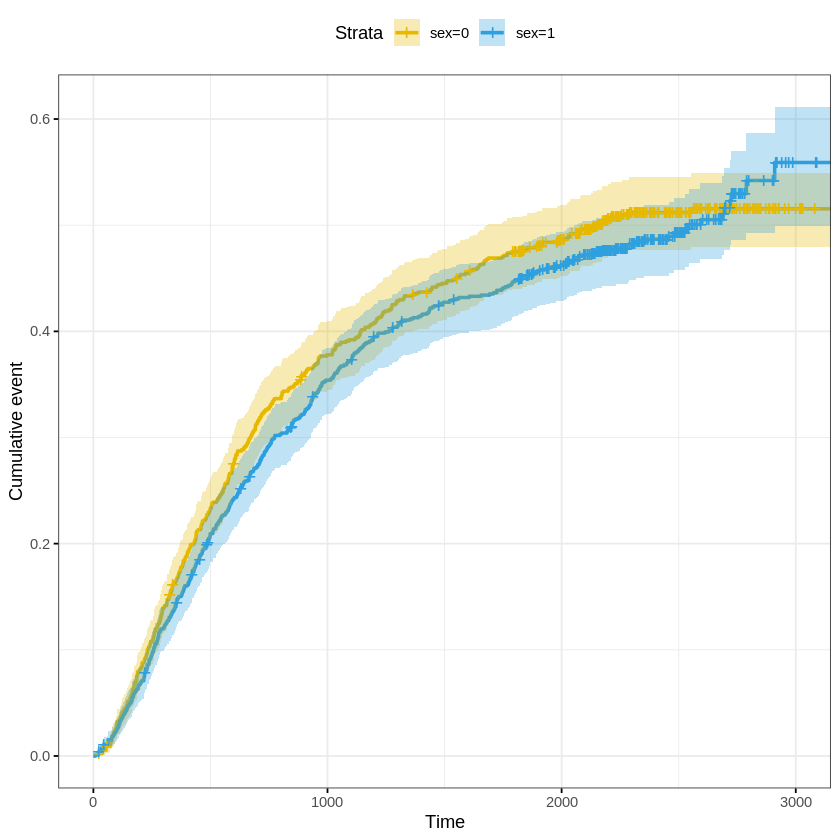

In [ ]:
# кумулята событий--------------------------------------------------------------
survminer::ggsurvplot(fit,
                      data = data,
                      conf.int = TRUE,
                      risk.table.col = "strata",
                      ggtheme = theme_bw(),
                      palette = c("#E7B800", "#2E9FDF"),
                      fun = "event")

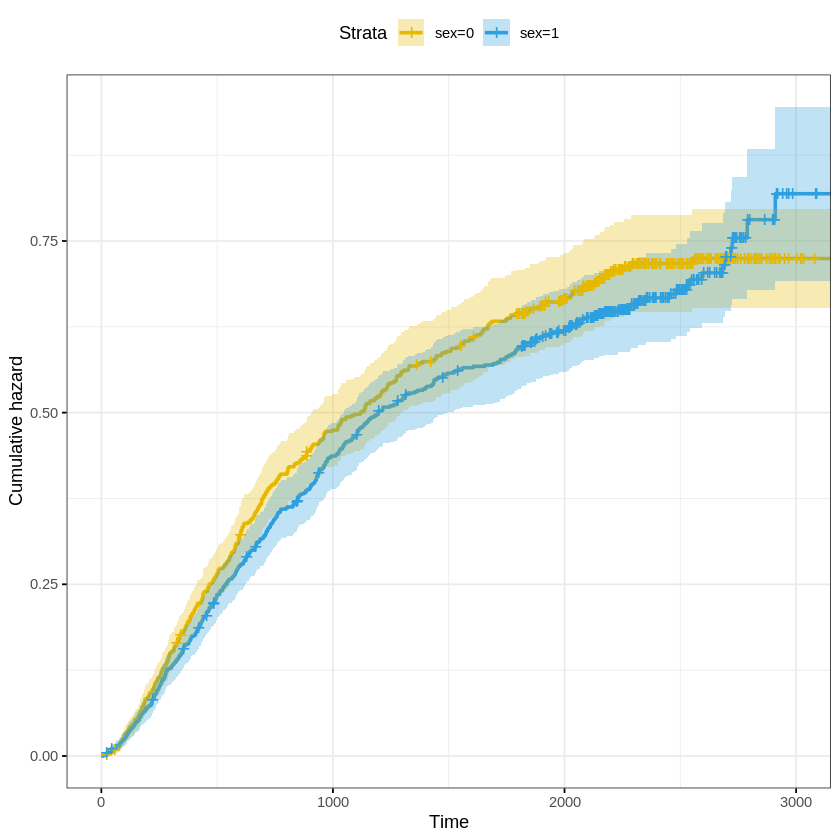

In [ ]:
# кумулята риска----------------------------------------------------------------
survminer::ggsurvplot(fit,
                      data = data,
                      conf.int = TRUE,
                      risk.table.col = "strata",
                      ggtheme = theme_bw(),
                      palette = c("#E7B800", "#2E9FDF"),
                      fun = "cumhaz")

# Сравнение кривых выживаемости с различными ковариатами

In [ ]:
# ковариата - по наличию непроходимости кишки-----------------------------------
fit <- survfit(Surv(time, status==1) ~ obstruct, data = data)

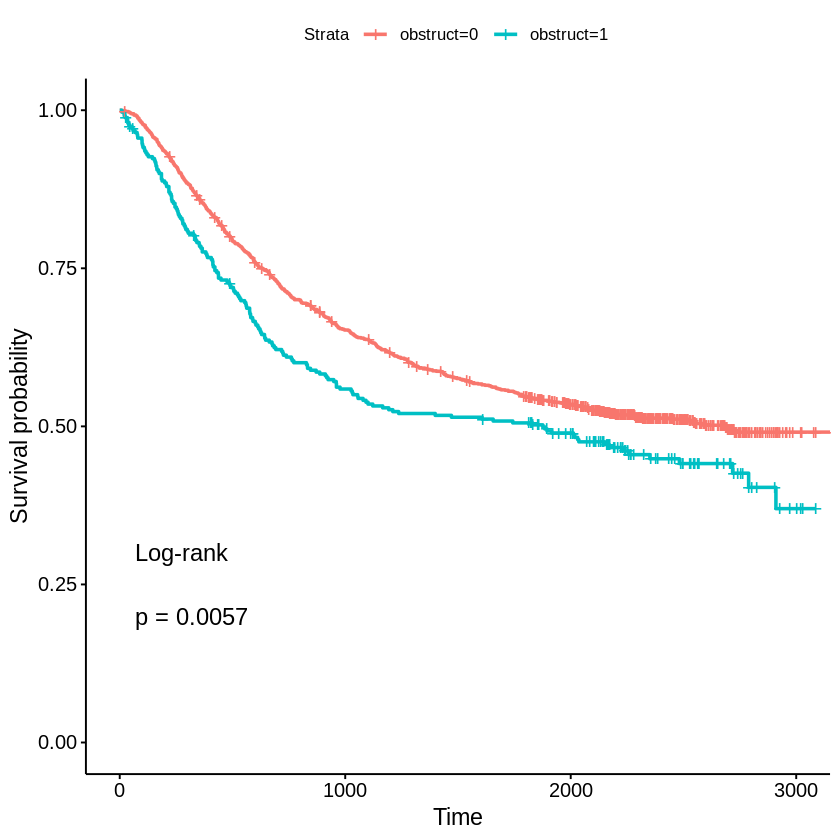

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

In [ ]:
# ковариата - по нарушению целостности стенки кишечника-------------------------
fit <- survfit(Surv(time, status==1) ~ perfor, data = data)

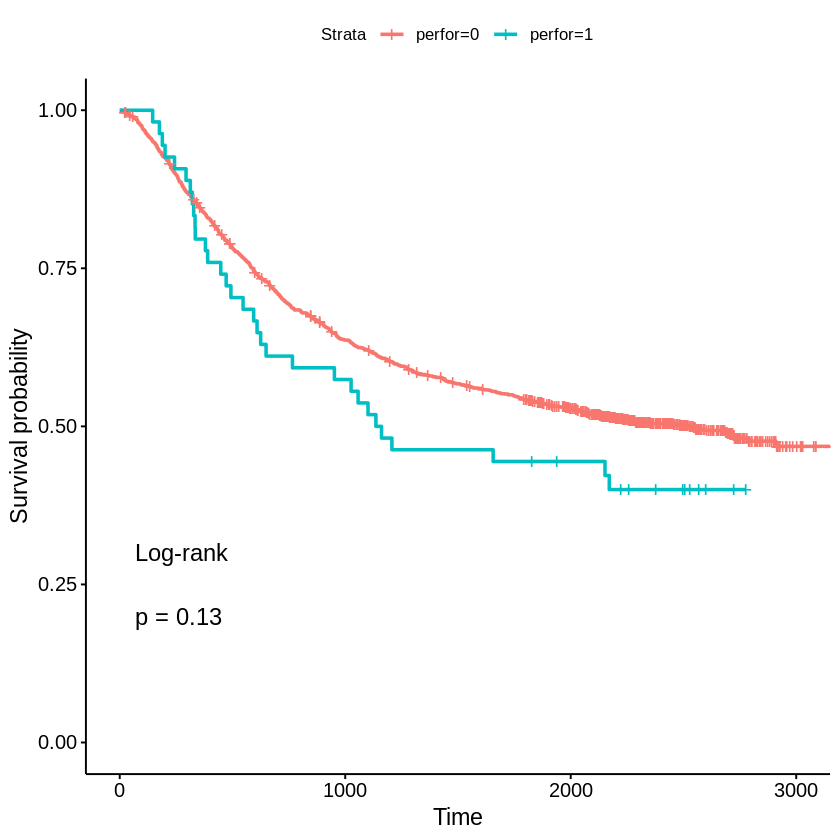

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

In [ ]:
# ковариата - по контакту с близлежащими органами-------------------------------
fit <- survfit(Surv(time, status==1) ~ adhere, data = data)

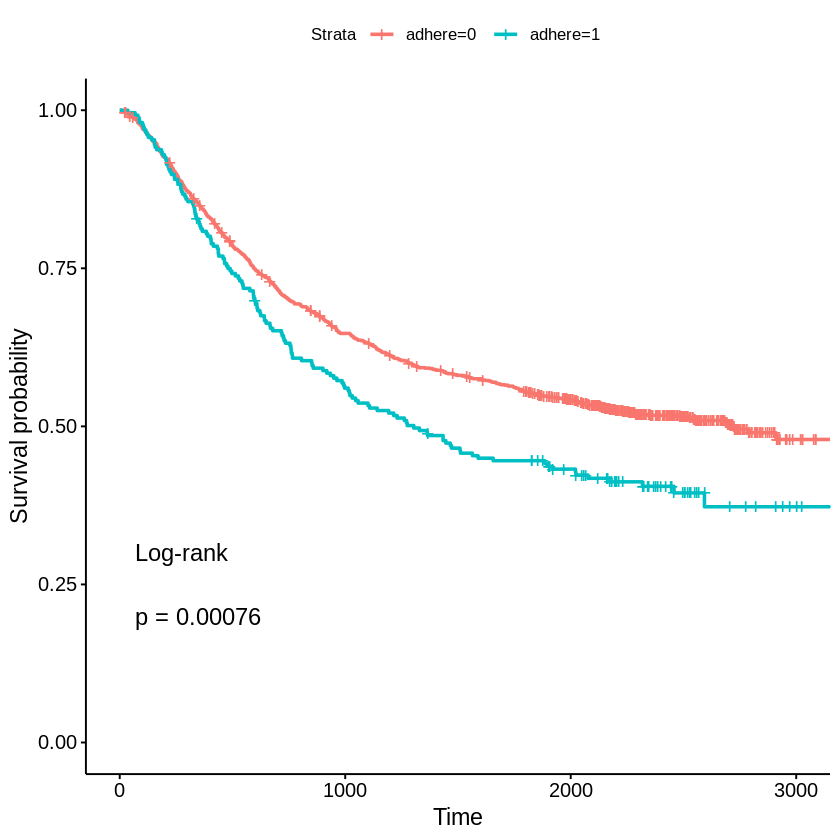

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

In [ ]:
# ковариата - дифференцировка опухоли-------------------------------------------
fit <- survfit(Surv(time, status==1) ~ differ, data = data)

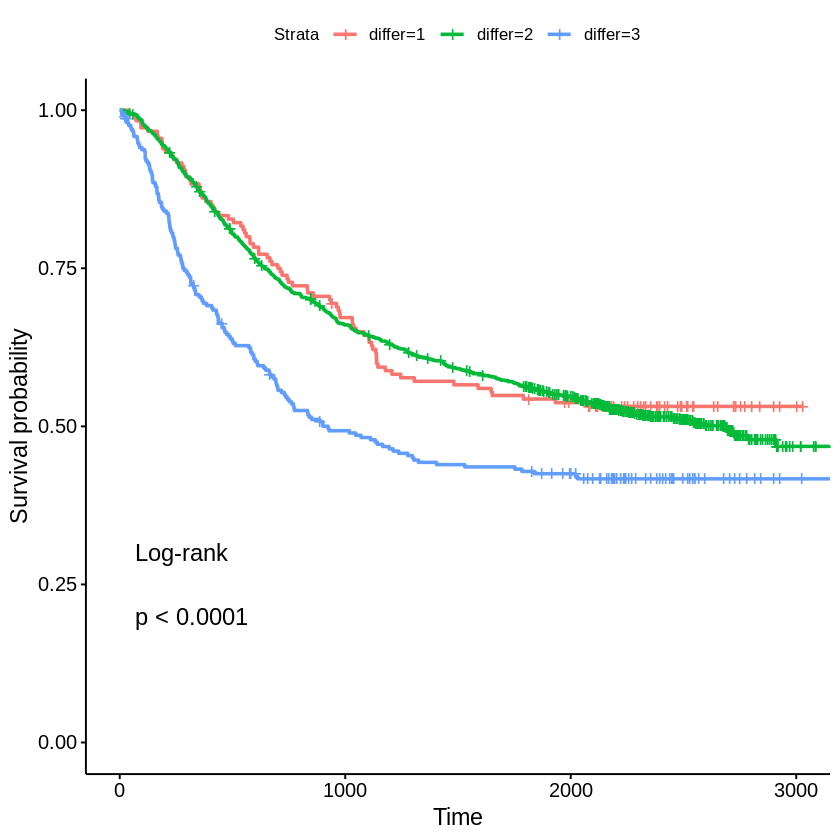

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

In [ ]:
# ковариата - по наличию отсрочки операции--------------------------------------
fit <- survfit(Surv(time, status==1) ~ surg, data = data)

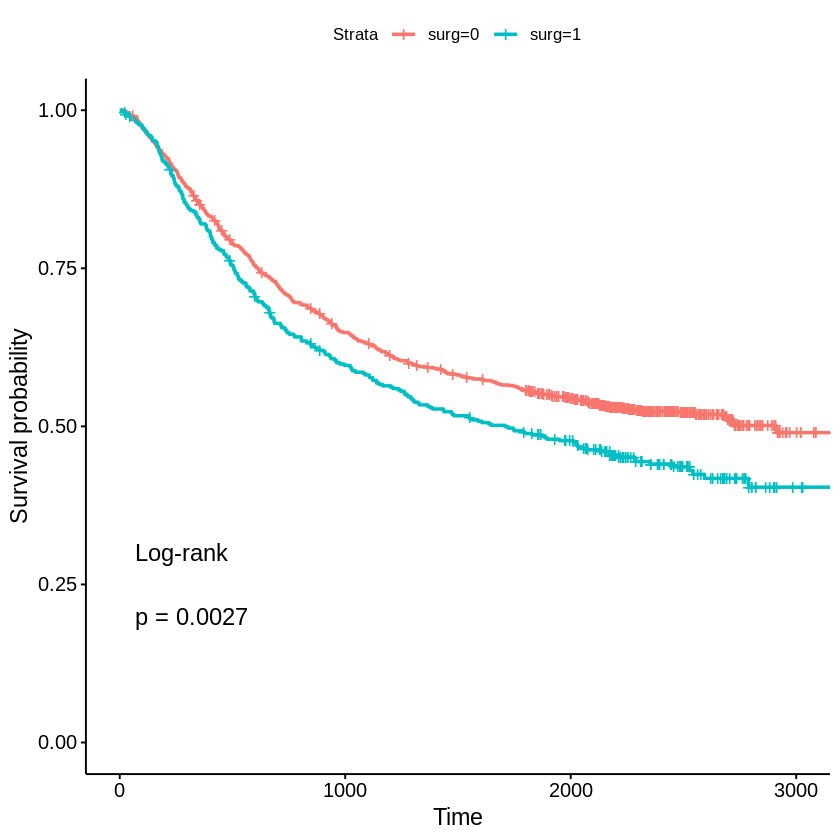

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

In [ ]:
# ковариата - по типу собитыя---------------------------------------------------
fit <- survfit(Surv(time, status==1) ~ etype, data = data)

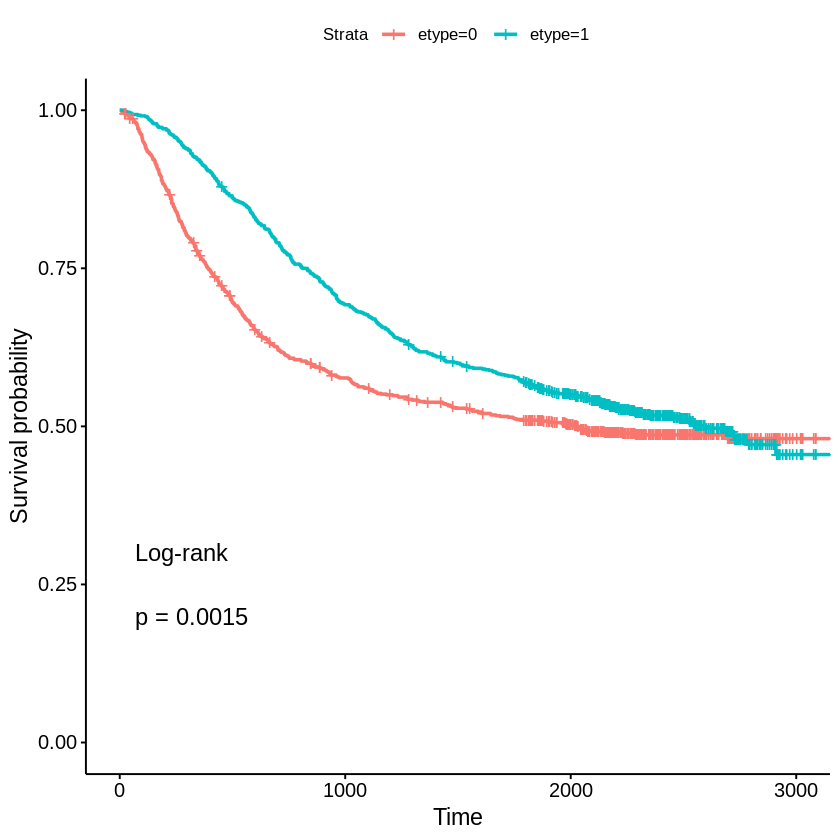

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

In [ ]:
# ковариата - по типу терапии---------------------------------------------------
fit <- survfit(Surv(time, status==1) ~ rx, data = data)

In [ ]:
survdiff(Surv(time, status==1) ~ rx, data = data)

Call:
survdiff(formula = Surv(time, status == 1) ~ rx, data = data)

             N Observed Expected (O-E)^2/E (O-E)^2/V
rx=Lev     588      310      279      3.37      4.95
rx=Lev+5FU 578      230      309     20.20     31.28
rx=Obs     610      336      288      8.12     12.11

 Chisq= 31.8  on 2 degrees of freedom, p= 1e-07 

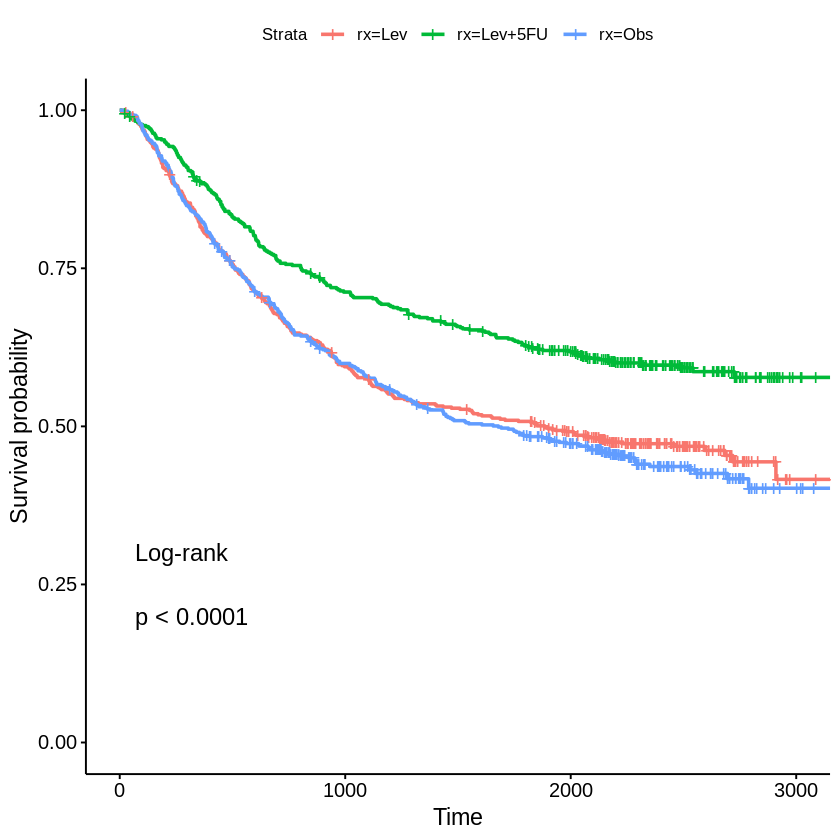

In [ ]:
survminer::ggsurvplot(fit, data=data, pval = TRUE, pval.method = TRUE)

Пациенты со схемой лечения Lev+5FU выживают чаще.

# Сюжет выживания

In [ ]:
install.packages('sm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(sm)

Package 'sm', version 2.2-6.0: type help(sm) for summary information



In [ ]:
sm.options(
  list(
    xlab = "Age (years)",
    ylab = "Median time to death (years)")
  )

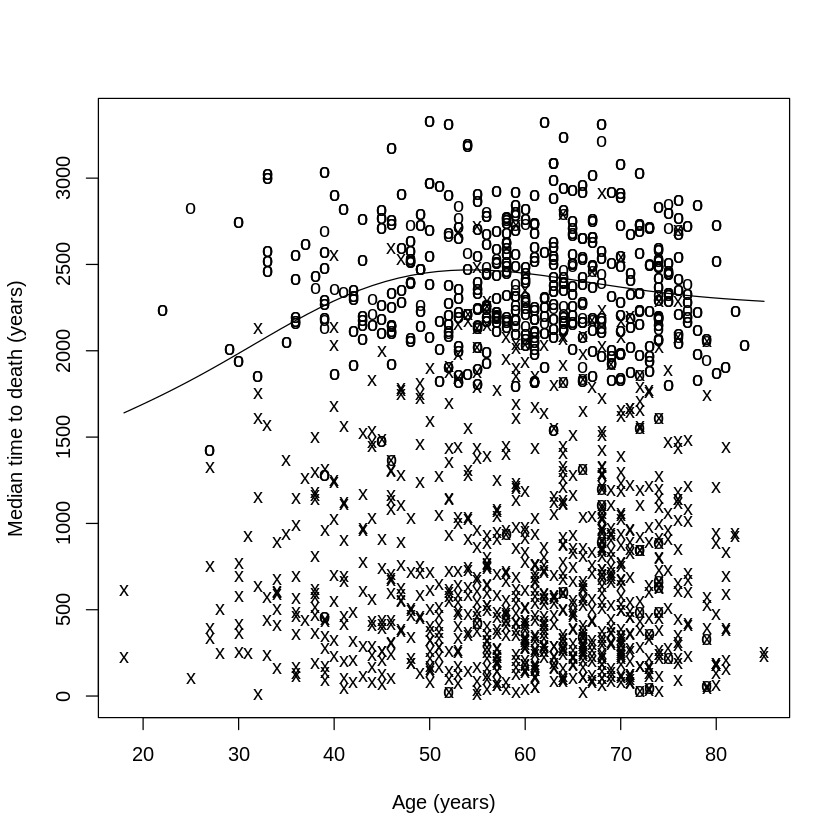

In [ ]:
sm.survival(
  x = data$age,
  y = data$time,
  status = data$status,
  h = (1/6) * sd(data$age) / nrow(data)^(-1/4)
  )

x - события

o - цензурирование

Линия - сглаженная оценка медианы выживаемости в зависимости от возраста

# Множественная группировка

In [ ]:
df <- data

In [ ]:
s3 <- survfit(Surv(time, status==1) ~ sex + rx + differ, data = df)

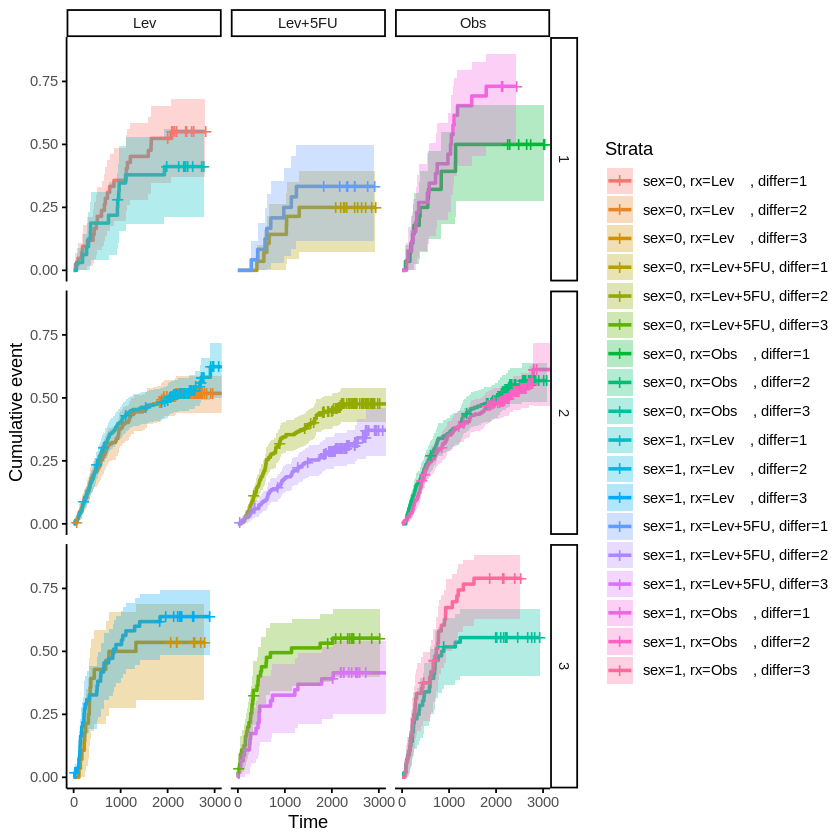

In [ ]:
# кумулята риска----------------------------------------------------------------
ggsurv <- ggsurvplot(s3, fun = 'event', conf.int = TRUE, ggtheme = theme_classic())
ggsurv$plot + theme(legend.position = "right") + facet_grid(differ ~ rx)

В группе мужчин с терапией Lev+5FU и с первой степенью дифференцировки опухоли риск наименьший.

Наибольший риск у женщин с лечением Obs и со степенью 1 и 3.